<a href="https://colab.research.google.com/github/medeirosgian/Data-Science/blob/main/Projetos/Fraude%20no%20CC/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de fraudes no cartão de crédito através de modelos de Machine Learning

Só no período de Junho de 2019 a Junho de 2020, cerca de quase 9 milhões de brasileiros foram vítimas de algum tipo de fraude utilizando cartões de banco (fonte: [NotíciasR7](https://noticias.r7.com/economia/fraudes-com-cartao-disparam-na-pandemia-veja-como-se-prevenir-19062020)), e cerca de 58% dessas fraudes são feitas utilizando o cartão de crédito como via (fonte: [Época](https://oglobo.globo.com/epoca/guilherme-amado/58-das-fraudes-de-2020-foram-com-cartao-de-credito-diz-pesquisa-24828376#:~:text=Em%202020%2C%2058%25%20das%20fraudes,feitas%20com%20cart%C3%A3o%20de%20cr%C3%A9dito.&text=No%20per%C3%ADodo%2C%20a%20pesquisa%20detectou,de%20notas%20falsas%20(8%25).)).

Tentando solucionar esse tipo de problema, cada vez mais os bancos implementam maneiras de detectar essas operações fraudulentas, para evitar o incômodo tanto por parte dos clientes quanto por parte do banco que tem de fazer o ressarcimento.

<p align=center>
<img src="https://www.melhoresdestinos.com.br/wp-content/uploads/2020/08/cartao-de-credito-pagbank-sem-anuidade-820x603.png" width="60%"></p>

Aproveitando a narrativa, neste projeto iremos abordar o tema e desenvolver um método de **previsão de fraudes no cartão de crédito utilizando modelos de Machine Learning**, além de abordar os problemas e cuidados nesse tipo de desenvolvimento.

## Obtendo dados

Como em qualquer outro problema de Data Science, dados são a base de qualquer análise, neste caso iremos utilizar dados disponibilizados publicamente via [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud) de bancos europeus, todos os dados são anônimos para preservar a identidade dos clientes. Os dados são referentes a transações realizadas pelos consumidores no mês de Setembro de 2013.

In [99]:
# Instalar scikitplot
!pip install -q scikit-plot

In [100]:
# Import das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

**Os dados não foram hospedados no GitHub por ultrapassarem o limite máximo de hospedagem do site**

In [101]:
# Import dos dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Visão geral dos dados

Como dito na página dos dados no Kaggle, as colunas não possuem nome que caracterizem informações além de não prover nenhuma informação adicional, a fim de não divulgar mais informações confidenciais sobre os clientes ou procedimentos da empresa.

As entradas possuem somente valores númericos, que foram calculados utilizando a técnica de transformação de dados chamada de PCA (Análise de Componentes Principais), técnica estatística que busca ressaltar padrões mais fortes de alterações em grandes quantidades de dados, mais informações sobre essa técnica podem ser encontradas [neste artigo](https://en.wikipedia.org/wiki/Principal_component_analysis).

In [102]:
# Verificar total de entradas
print(f'Total de entradas: {df.shape[0]}')

# Verificar entradas nulas
print(f'Total de entradas vazias: {df.isnull().sum().max()}')

# Tipos de dados
df.dtypes

Total de entradas: 284807
Total de entradas vazias: 0


Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [103]:
# Vendo descrição dos dados
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Entradas

Como verificado acima, temos um total de 284.807 entradas, sendo que todas estão preenchidas com dados. Além disso, todas as colunas possuem variáveis do tipo *float* ou *int*, o que facilita a análise.

0.1727% de entradas referentes a dados fraudulento


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


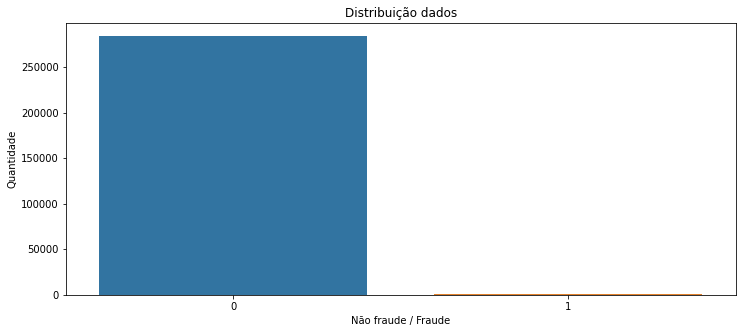

In [104]:
# Quantidade de entradas fraudulentas/não fraudulentas
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot('Class', data=df, )
ax.set_title('Distribuição dados')
ax.set_xlabel('Não fraude / Fraude')
ax.set_ylabel('Quantidade')

# Ver porcentagem de entradas fraudulentas
print('{:.4f}% de entradas referentes a dados fraudulento'.format(df[df.Class == 1].shape[0] / df.shape[0] * 100))

### Distribuição dos dados

Agora nós encaramos o primeiro problema, os dados são **extremamente desbalanceados**, cerca de 99,8% dos dados são referentes a transações não-fraudulentas, isso representa que a empresa tem 0,17% de transações fraudulentas (o que é bom), mas isso se torna um problema no caso da construção de um modelo de previsão, e por que exatamente isso é um problema?

Como o objetivo desse projeto é **detectar fraudes**, o nosso modelo precisa de dados para "alimentar" esse padrão, como neste caso temos 1 única entrada fraudulenta para cada 1000 entradas, o nosso modelo tenderá a ficar enviesado a detectar entradas como não-fraudulentas.

Vamos verificar a ocorrência disso na prática.

#### Padronização dos dados

Como dito anteriormente os dados passaram pelo processo de transformação de dados chamado PCA, o que mantém o maior número de informações possível em uma dimensão menor, além disso as colunas não possuem nomes categóricos.

Porém, as colunas *Time*, *Amount* e *Class* não passaram por esse processo e representam respectivamente o tempo de transação, a quantidade de dinheiro movimentado e se a transação foi fraudulenta ou não (sendo 0 não-fraudulenta e 1 fraudulenta). Por isso, devemos padronizar esses dados, devido ao fato de que o modelo que usaremos mais pra frente, o modelo de Regressão Logística, não aceita dados que não sejam padronizados (exceto a coluna *class* por serem valores únicos).

In [105]:
# Padronizar dados ainda não padronizados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df[['Time', 'Amount']])
df[['Time', 'Amount']] = scaler.transform(df[['Time', 'Amount']])

### Criando um modelo desbalanceado

Agora iremos criar um modelo de classificação com esses dados desbalanceados, para isso irei utilizar o modelo de regressão logística, apenas por demonstração, utilizando outros modelos de classificação como o Decision Tree deverá apresentar resultados parecidos.

Só para relembrar, aqui as colunas (exceto a Class), serão nossas variáveis independentes, e a coluna Class a nossa variável dependente.

In [106]:
# Criar regressão logística com dados desbalanceados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Criando modelo
model_logistic1 = LogisticRegression()

# Separando dados
X = df.drop('Class', axis = 1)
y = df['Class']

# Dividindo dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit dos dados no modelo
model_logistic1.fit(X_train, y_train)

# Realizar predição com dados de teste
y_pred1 = model_logistic1.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.92      0.66      0.77       125

    accuracy                           1.00     71202
   macro avg       0.96      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202



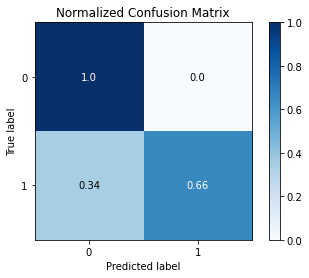

In [107]:
# Criar report e matriz de confusão
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Report
print(classification_report(y_test, y_pred1))

# Heatmap matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True)

#### Analisando os resultados

Analisando o gráfico acima e o *classification report*, podemos observar que o modelo possui **100% de acurácia**, o problema é que no caso de dados desbalanceados, a acurácia não representa um métrica válida e na matriz de confusão nós podemos observar o porquê.

Devido ao fato de mais de 99% dos dados serem referentes a transações nã-fraudulentas, o nosso modelo é muito bom em detectar esse tipo de operação, porém, esse não é o nosso objetivo, queremos justamente o contrário, análisar as operações que são fraudulentas, e para isso o nosso modelo deve sempre buscar um equilíbrio nos dados (50% de cada caso é o ideal), para que não ocorra um caso de *overfitting*, ou seja, que o modelo seja muito bom pra um caso específico de dado ou condição. 

Quanto a medição de acurácia, vamos análisar essa métrica: o nosso modelo possui mais de 99% de entradas não-fraudulentas, e como ele possui essa quantidade de dados desbalanceada, ele se tornou muito bom em prever esse tipo de operação, tendo um acerto de 100% no modelo de previsão, porém, ele **errou metade das operações fraudulentas**(o resultado pode ser alterado executando o modelo novamente, porém iremos discutir isso mais pra frente) quando tentamos prever esse tipo de operação, mas ainda obteve uma acurácia de 100%, porque esse tipo de operação é quase insignificante perante o total de dados.

Para medir esse tipo de modelo, onde os dados são desbalanceados, a medida de Area Under Curve (AUC) da curva ROC pode ser uma boa escolha, já que ele avalia a classificação de modelos de classificação binários (que tenham resultado sim/não). Podemos verificar essa precisão através da função abaixo:

In [108]:
# Medindo a Area Under Curve
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred1)))

AUC: 0.8320



Como vimos acima, a AUC foi menor que a acurácia do modelo, porém devemos fazer ainda uma análise mais profunda dos resultados que obtemos.

Se você trabalha em um banco e quer prever frauder, qual seria o pior cenário? Seria não detectar as fraudes, o que prejudicaria os clientes e o próprio banco/cooperativa. Nesse caso podemos observar que temos quase metade de fraudes não detectadas (o número varia conforme execução do modelo), chegando a errar até 99% das vezes em alguns modelos.

Logo, o nosso objetivo seria ter o mínimo de falsos negativos possível, pra isso podemos até ter um número superior de falsos positivos, visto que detectar uma operação normal como fraude não necessariamente prejudica alguém, além do transtorno habitual de liberar o cartão, que é muito mais fácil que estornar uma compra fraudulenta.

Realizando o balanceamento dos dados, buscamos minimizar os falsos negativos, sendo esse o nosso objetivo central.

Para realizar esse balanceamento, iremos utilizar uma técnica chamada de **Under Sampling** que iguala o número de entradas fraudulentas as não fraudulentas.

### Criando um modelo balanceado
#### Under Sampling

In [109]:
# Under sampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler();
X_res, y_res = rus.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Para observarmos a diferença de dados desbalanceados/balanceados, vamos observar uma matriz de correlação com os dois tipos de dados.

Text(0.5, 1.0, 'Balanceado')

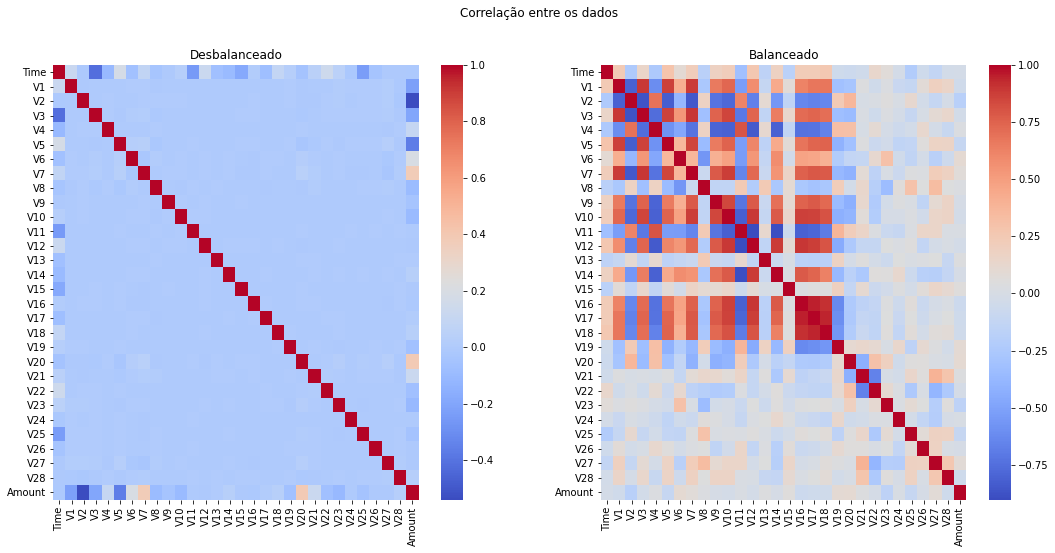

In [110]:
# Correlação dos dados
corr1 = X_train.corr()
corr2 = pd.DataFrame(X_res).corr()

# Plotar correlação
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Correlação entre os dados')

sns.heatmap(corr1, xticklabels=corr1.columns, yticklabels=corr1.columns, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr2, xticklabels=corr1.columns, yticklabels=corr1.columns, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Balanceado')


### Definição dos métodos de classificação

Nesse projeto, além de criar o modelo de classificação para detectar as fraudes, irei comparar dois dos principais modelos de classificação, sendo eles os modelos de *Regressão Logística* e *Decision Tree*. Ambos possuem métodos diferentes para classificar os dados e ao final iremos comparar ambos com os dados desbalanceados.

#### Método 1 - Regressão Logística

Agora que temos os dados balanceados e padronizados, podemos realizar o fit dos dados nos respectivos modelos e realizar o predict para comparar os resultado. O primeiro modelo que iremos fazer isso será o de Regressão Logística.

In [111]:
# Método 1 - Regressão Logística
# Criando modelo
model_logistic2 = LogisticRegression()

# Fit de dados balanceados
model_logistic2.fit(X_res, y_res)

# Fazer predição com os dados balanceados
y_pred2 = model_logistic2.predict(X_test)

Agora podemos criar um report e plotar novamente uma matriz de confusão para comparar os resultados.

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71077
           1       0.05      0.94      0.09       125

    accuracy                           0.97     71202
   macro avg       0.52      0.96      0.54     71202
weighted avg       1.00      0.97      0.98     71202

AUC: 0.9555



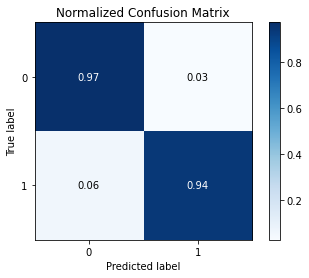

In [112]:
# Criar report2 e matriz de confusão2

# Report
print(classification_report(y_test, y_pred2))
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred2)))

# Heatmap matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)

Como podemos ver, com os dados balanceados temos uma minimização da ocorrência de falsos negativos, que é o nosso objetivo principal, antes de discutirmos esses resultados, vamos criar o modelo 2.

#### Método 2 - Decision Tree

Agora iremos criar o segundo modelo, que utilizará o método de classificação através de Decision Tree (Árvore de Classificação).

In [113]:
# Método 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dtree = DecisionTreeClassifier(max_depth=2, criterion='entropy')

# Fit dos dados no modelo
model_dtree.fit(X_res, y_res);

# Fazer predict com decision tree
y_pred3 = model_dtree.predict(X_test)

Novamente podemos criar um report e uma nova matriz de confusão para compararmos os resultados.

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71077
           1       0.02      0.94      0.03       125

    accuracy                           0.90     71202
   macro avg       0.51      0.92      0.49     71202
weighted avg       1.00      0.90      0.94     71202

AUC: 0.9208



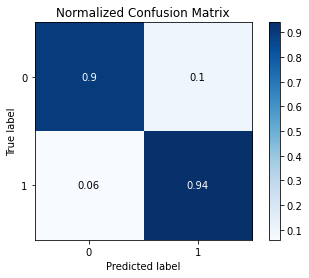

In [114]:
# Criar report

# Report
print(classification_report(y_test, y_pred3))
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred3)))

# Heatmap matriz de  confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred3, normalize=True)

Como podemos observar, novamente conseguimos minimizar os falsos negativos, além de obter uma AUC superior

Criados os dois modelos utilizando os dados balanceados, podemos comparar esses resultados.

### Comparando os resultados

Agora nós temos 3 modelos diferentes, um utilizando os dados brutos e desbalanceados, e dois utilizando dados balanceados e métodos de classificação diferentes, podemos facilmente comparar os resultados e escolher o melhor modelo.

Para isso, iremos utilizar como apoio um gráfico horizontal que compara os três modelos, o que facilita a nossa decisão do melhor modelo.

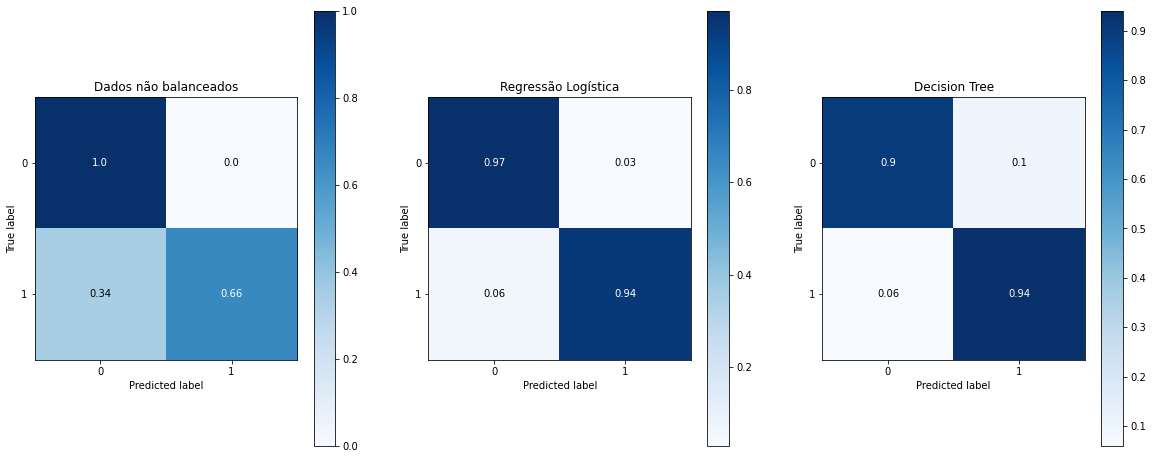

In [115]:
# Comparação modelos
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(131)
skplt.metrics.plot_confusion_matrix(y_test, y_pred1, normalize=True, ax=ax1)

ax2 = fig.add_subplot(132)
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True, ax=ax2)

ax3 = fig.add_subplot(133)
skplt.metrics.plot_confusion_matrix(y_test, y_pred3, normalize=True, ax=ax3)

ax1.title.set_text('Dados não balanceados')
ax2.title.set_text('Regressão Logística')
ax3.title.set_text('Decision Tree')

Abaixo vou colocar alguns insights que podem ser tirados dos três modelos, afim de ajudar no processo de decisão:

- Dados desbalanceados acabam com a eficácia do modelo, fazendo com que o modelo se torne altamente enviesado.

- Os modelos que utilizam dados balanceados tem acurácia parecida quanto a prever falsos negativos, porém o modelo que utiliza a regressão logística é superior em prever falsos positivos, o que pode ser usado em consideração na hora de escolher o modelo definitivo.

Além de avaliar os modelos, uma alternativa que pode ser avaliada na tomada de decisão é a coleta de mais dados (principalmente de transações fraudulentas) para alimentar o modelo, aumentando sua precisão na detecção das fraudes. O processo de melhoria do modelo deve ser constante principalmente por se tratar de procedimentos que prejudicam o cliente, o que impacta diretamente na imagem da empresa.

Os dados foram disponibilizados após sofrerem transformações, o que facilitou o processo, porém também foram disponibilizados sem muitas informações, como o que cada coluna representa, o que poderia ser utilizado como critério na hora da construção do modelo.